In [9]:
import requests
from bs4 import BeautifulSoup as bs
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
weather_url = "https://weather.com/weather/tenday/l/San+Francisco+CA?canonicalCityId=dfdaba8cbe3a4d12a8796e1f7b1ccc7174b4b0a2d5ddb1c8566ae9f154fa638c"
uClient = requests.get(weather_url) # requesting the webpage from the internet
weatherPage = uClient.text
weather_html = bs(weatherPage, "html.parser")
# print(weather_html.prettify())

In [4]:
temps = weather_html.findAll("span",{"class":"DailyContent--temp--_8DL5"})
week_days = weather_html.findAll("span", {"class":"DailyContent--daypartDate--3MM0J"})
descriptions = weather_html.findAll('p', {"class":"DailyContent--narrative--3AcXd"})
humidities = weather_html.findAll('span', {"class":"DetailsTable--value--1F3Ze"})
# print(len(temps))
print(temps)

# print(len(week_days))
print(week_days)

# print(len(conditions))
# print(conditions)

# print(len(humidities))
# print(humidities)


[<span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">63°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">44°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">57°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">42°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">55°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">46°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">57°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">50°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">57°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">47°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">57°</span>, <span class="DailyContent--temp--_8DL5" data-testid="TemperatureValue">43°</span>, <sp

In [5]:
def get_content(features):
    item_list = []
    for data in features:
        item_list.append(data.getText())
    return item_list



In [17]:
weekday_list = get_content(week_days)
temp_list = get_content(temps)
weekday_list = list(dict.fromkeys(weekday_list))
descriptions_list = get_content(descriptions)
humidity_list = get_content(humidities)

In [18]:
temp_high = []
temp_low = []
descriptionday_list = []
descriptionnight_list = []
for i in range(0, 30, 2):
    high = int(temps[i].get_text().strip('°'))
    high = (high-32) * 5/9
    temp_high.append(round(high, 0))
    descriptionday_list.append(descriptions_list[i])
    
    low = int(temps[i+1].get_text().strip('°'))
    low = (low-32) * 5/9
    temp_low.append(round(low, 0))
    descriptionnight_list.append(descriptions_list[i+1])
# print(temp_high)
# print(temp_low)
# print(descriptionday_list)
# print(descriptionnight_list)


In [19]:
humidity_day=[] 
UVIndex_day=[]
sunrise_time=[]
sunset_time=[]
humidity_night=[]
UVIndex_night=[]
moonrise_time=[]
moonset_time=[]

In [20]:
i = 0
while i < len(humidity_list):
    humidity_day.append(humidity_list[i])
    i+=1
    UVIndex_day.append(humidity_list[i])
    i+=1
    sunrise_time.append(humidity_list[i])
    i+=1
    sunset_time.append(humidity_list[i])
    i+=1
    humidity_night.append(humidity_list[i])
    i+=1
    UVIndex_night.append(humidity_list[i])
    i+=1
    moonrise_time.append(humidity_list[i])
    i+=1
    moonset_time.append(humidity_list[i])
    i+=1

In [21]:
# humidity_list = get_content(humidities)
# day_dict = {}
# i = 0
# j = 0
# while i< len(humidity_list):
#     feature = ['humidity_day','UVIndex_day','sunrise_time','sunset_time','humidity_night', 'UVIndex_night', 'moonrise_time', 'moonset_time', 'day']
#     data_dict = {}.fromkeys(feature,0)
#     data_dict['humidity_day'] = humidity_list[i]
#     i+=1
#     data_dict['UVIndex_day'] = [humidity_list[i]]
#     i+=1
#     data_dict['sunrise_time'] = humidity_list[i]
#     i+=1
#     data_dict['sunset_time'] = humidity_list[i]
#     i+=1
#     data_dict['humidity_night'] = humidity_list[i]
#     i+=1
#     data_dict['UVIndex_night'] = humidity_list[i]
#     i+=1
#     data_dict['moonrise_time'] = humidity_list[i]
#     i+=1
#     data_dict['moonset_time'] = humidity_list[i]
#     i+=1
#     day_dict[week_days[j].get_text()] = data_dict
#     j+=1


In [22]:
df = pd.DataFrame(columns = [ 'day','temp_day','temp_night','sunrise_time','sunset_time','humidity_day','UVIndex_day','humidity_night', 'UVIndex_night', 'moonrise_time', 'moonset_time'])

In [24]:
df['day'] = weekday_list
df['temp_day'] = temp_high
df['humidity_day'] = humidity_day
df['UVIndex_day'] = UVIndex_day
df['sunrise_time'] = sunrise_time
df['sunset_time'] = sunset_time
df['description_day'] = descriptionday_list
df['temp_night'] = temp_low
df['humidity_night'] = humidity_night
df['UVIndex_night'] = UVIndex_night
df['moonrise_time'] = moonrise_time
df['moonset_time'] = moonset_time
df['description_night'] = descriptionnight_list

In [25]:
df.head(16)

,day,temp_day,temp_night,sunrise_time,sunset_time,humidity_day,UVIndex_day,humidity_night,UVIndex_night,moonrise_time,moonset_time,description_day,description_night
0,Wed 09,17.0,7.0,7:14 am,4:50 pm,46%,1 of 10,76%,0 of 10,1:16 am,1:46 pm,Cloudy. High 63F. Winds NNW at 5 to 10 mph.,Partly cloudy early with increasing clouds ove...
1,Thu 10,14.0,6.0,7:14 am,4:50 pm,76%,2 of 10,77%,0 of 10,2:26 am,2:16 pm,Some clouds in the morning will give way to ma...,Mostly clear skies early will become overcast ...
2,Fri 11,13.0,8.0,7:15 am,4:51 pm,62%,2 of 10,83%,0 of 10,3:38 am,2:49 pm,Partly cloudy skies in the morning will give w...,Rain showers in the evening will evolve into a...
3,Sat 12,14.0,10.0,7:16 am,4:51 pm,84%,1 of 10,91%,0 of 10,4:52 am,3:28 pm,Light rain early...then remaining cloudy with ...,Showers early becoming a steady light rain lat...
4,Sun 13,14.0,8.0,7:17 am,4:51 pm,86%,1 of 10,88%,0 of 10,6:07 am,4:11 pm,A steady rain in the morning. Showers continui...,"Showers in the evening, then cloudy overnight...."
5,Mon 14,14.0,6.0,7:17 am,4:51 pm,76%,2 of 10,87%,0 of 10,7:21 am,5:04 pm,Partly cloudy skies. High 57F. Winds WNW at 5 ...,"Partly cloudy skies in the evening, then becom..."
6,Tue 15,14.0,7.0,7:18 am,4:52 pm,75%,2 of 10,87%,0 of 10,8:29 am,6:03 pm,Sunshine and clouds mixed. High 57F. Winds W a...,Considerable cloudiness. Low near 45F. Winds l...
7,Wed 16,14.0,7.0,7:19 am,4:52 pm,76%,2 of 10,86%,0 of 10,9:28 am,7:08 pm,Showers in the morning with some clearing in t...,Mostly cloudy. Low around 45F. Winds light and...
8,Thu 17,14.0,7.0,7:19 am,4:52 pm,70%,2 of 10,80%,0 of 10,10:17 am,8:14 pm,Mainly cloudy. High 58F. Winds NW at 5 to 10 mph.,Mainly cloudy. Low around 45F. Winds WNW at 5 ...
9,Fri 18,14.0,7.0,7:20 am,4:53 pm,70%,2 of 10,83%,0 of 10,10:58 am,9:20 pm,Considerable cloudiness. High 57F. Winds NW at...,Cloudy with occasional rain showers. Low near ...


In [26]:
df.info()
df.temp_day = df.temp_day.astype('int64')
df.temp_night = df.temp_night.astype('int64')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   day                15 non-null     object 
 1   temp_day           15 non-null     float64
 2   temp_night         15 non-null     float64
 3   sunrise_time       15 non-null     object 
 4   sunset_time        15 non-null     object 
 5   humidity_day       15 non-null     object 
 6   UVIndex_day        15 non-null     object 
 7   humidity_night     15 non-null     object 
 8   UVIndex_night      15 non-null     object 
 9   moonrise_time      15 non-null     object 
 10  moonset_time       15 non-null     object 
 11  description_day    15 non-null     object 
 12  description_night  15 non-null     object 
dtypes: float64(2), object(11)
memory usage: 1.6+ KB


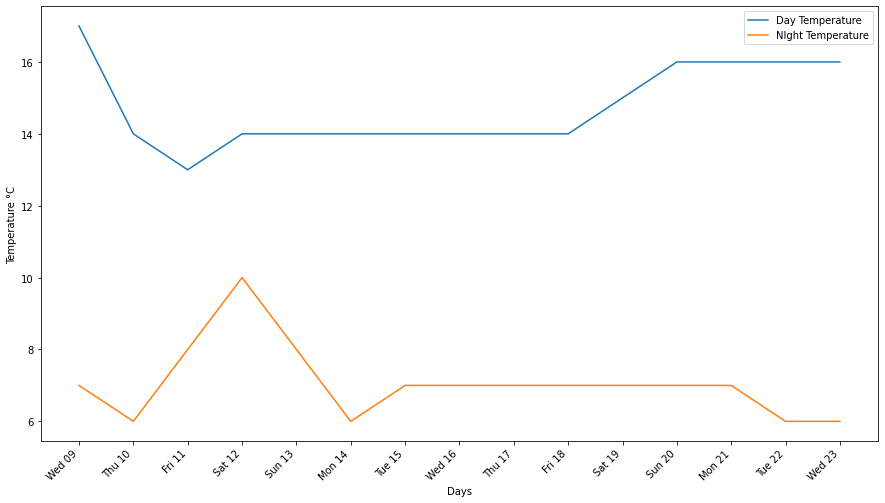

In [27]:
plt.figure(figsize=(15, 8))
plt.plot(df.day, df.temp_day, label="Day Temperature")
plt.plot(df.day, df.temp_night, label="NIght Temperature")
plt.xticks(rotation=45, ha='right')
plt.xlabel("Days",)
plt.ylabel("Temperature °C")
# plt.rcParams.update({'font.size': 12})
plt.legend()
plt.show()